In [36]:
import pandas as pd
import re
from math import sin, cos, sqrt, atan2, radians

headers = ['uuid', 'Price Paid', 'Date Sold', 'Postcode', 'Property Type', 'Old/New', 'LeaseType', 'PAON', 'SAON', 'Street', 'Locality', 'Town', 'District', 
           'County', 'PPD Category Type', 'Record Status - monthly file only']

df_uk_2019 = pd.read_csv('/Users/Chai/Desktop/Projects/Data Science/Capstone/pp-2019.csv', names=headers, header=1)
df_london_2019 = df_uk_2019[df_uk_2019['Town'].str.contains('London', flags=re.IGNORECASE, regex=True)].reset_index(drop=True)

In [18]:
uk_postocodes = pd.read_csv('/Users/Chai/Desktop/Projects/Data Science/Capstone/ukpostcodes.csv')

In [50]:
london_sw_clusters = pd.read_csv('/Users/Chai/Desktop/Projects/Data Science/Capstone/london_sw_clusters.csv')

In [3]:
df_london_2019.District.unique()

array(['LAMBETH', 'WANDSWORTH', 'LEWISHAM', 'MERTON', 'SOUTHWARK',
       'GREENWICH', 'HARINGEY', 'ENFIELD', 'EALING', 'BARNET',
       'CITY OF LONDON', 'TOWER HAMLETS', 'HACKNEY', 'WALTHAM FOREST',
       'BRENT', 'CITY OF WESTMINSTER', 'KENSINGTON AND CHELSEA',
       'HAMMERSMITH AND FULHAM', 'ISLINGTON', 'NEWHAM', 'BROMLEY',
       'HOUNSLOW', 'CAMDEN', 'REDBRIDGE', 'CROYDON',
       'RICHMOND UPON THAMES', 'BEXLEY', 'EPPING FOREST',
       'KINGSTON UPON THAMES'], dtype=object)

In [10]:
df_london_2019

,uuid,Price Paid,Date Sold,Postcode,Property Type,Old/New,LeaseType,PAON,SAON,Street,Locality,Town,District,County,PPD Category Type,Record Status - monthly file only
0,{8A78B2AF-3493-5CB0-E053-6B04A8C0F504},590000,2019-03-29 00:00,N7 0LD,F,Y,L,"ADA LEWIS HOUSE, 1",FLAT 17,DALMENY AVENUE,NaN,LONDON,ISLINGTON,GREATER LONDON,A,A
1,{8A78B2AF-3494-5CB0-E053-6B04A8C0F504},705000,2019-03-11 00:00,N4 2BX,F,Y,L,"SKYLARK POINT, 48",FLAT 29,NEWNTON CLOSE,NaN,LONDON,HACKNEY,GREATER LONDON,A,A
2,{8A78B2AF-3495-5CB0-E053-6B04A8C0F504},590000,2019-03-29 00:00,N7 0LD,F,Y,L,"ADA LEWIS HOUSE, 1",FLAT 13,DALMENY AVENUE,NaN,LONDON,ISLINGTON,GREATER LONDON,A,A
3,{8A78B2AF-3496-5CB0-E053-6B04A8C0F504},590000,2019-03-29 00:00,N7 0LD,F,Y,L,"ADA LEWIS HOUSE, 1",FLAT 23,DALMENY AVENUE,NaN,LONDON,ISLINGTON,GREATER LONDON,A,A
4,{8A78B2AF-3497-5CB0-E053-6B04A8C0F504},399950,2019-03-29 00:00,W3 6NH,F,Y,L,ALEXANDRA HOUSE,23,OLDHAM TERRACE,NaN,LONDON,EALING,GREATER LONDON,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43179,{87E1551E-F0EB-6405-E053-6C04A8C0B2EE},120000,2019-04-03 00:00,SE6 1AY,O,N,F,340,NaN,BROWNHILL ROAD,CATFORD,LONDON,LEWISHAM,GREATER LONDON,B,A
43180,{87E1551E-EEB7-6405-E053-6C04A8C0B2EE},32440000,2019-03-29 00:00,N8 0EF,O,N,F,5,NaN,THE MEWS,NaN,LONDON,HARINGEY,GREATER LONDON,B,A
43181,{8F1B26BD-4348-53DB-E053-6C04A8C03649},510000,2019-07-09 00:00,SE9 3PB,T,N,F,58,NaN,MONTBELLE ROAD,NEW ELTHAM,LONDON,GREENWICH,GREATER LONDON,A,A
43182,{8F1B26BD-4349-53DB-E053-6C04A8C03649},550000,2019-05-31 00:00,SW16 6DL,T,N,F,67,NaN,BLEGBOROUGH ROAD,NaN,LONDON,WANDSWORTH,GREATER LONDON,A,A


In [4]:
import matplotlib.pyplot as plt

df_london_2019[df_london_2019['Postcode'].str.find('SW12') == 0].hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123007610>]],
      dtype=object)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

def tran_propertyType(rawType):
    if 'T' in rawType:
        return 'Y'
    elif 'D' in rawType:
        return 'Y'
    elif 'S' in rawType:
        return 'Y'
    else:
        return 'N'

df_london_2019['isHouse'] = df_london_2019.apply(lambda x: tran_propertyType(x['Property Type']), axis=1)
df_london_2019['PostCodeLoc'] = df_london_2019['Postcode'].str.find(' ').fillna(0)
df_london_2019['PostCodeLoc'] = df_london_2019['PostCodeLoc'].apply(np.int64)

df_london_filter = df_london_2019[df_london_2019['PostCodeLoc'] != 0]

df_london_filter['PostCodeFirst'] = df_london_filter.apply(lambda x: x['Postcode'][:x['PostCodeLoc']], axis=1)
df_london_filter['sold_year'] = pd.DatetimeIndex(df_london_filter['Date Sold']).year
df_london_filter['sold_month'] = pd.DatetimeIndex(df_london_filter['Date Sold']).month

df_london_filter = df_london_filter[(df_london_filter['isHouse'] == 'Y') 
                                    & (df_london_filter['Property Type'] != 'O')]

# fig, ax = plt.subplots()

# df_london_filter[(df_london_filter['PostCodeFirst'] == 'SW12') & (df_london_filter['isHouse'] == 'N')].plot(x='sold_month', y='Price Paid', kind='bar')

# df_london_grouped = df_london_filter.groupby(['District', 'PostCodeFirst', 'isHouse', 'sold_month']).agg({'Price Paid':['sum','mean','count']})
# df_london_out = df_london_grouped.reset_index()
# df_london_out

# fig, ax = plt.subplots()

# df_london_out[df_london_out['PostCodeFirst'] == 'SW17'].plot(x='sold_month',y='mean')

# df_london_grouped['mean'] = df_london_grouped['mean'].map('${:,.2f}'.format)

/Users/Chai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/Chai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/Chai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [6]:
df_london_filter.groupby('PostCodeFirst')['Price Paid'].mean()

PostCodeFirst
E1       595,000.00
E10      589,175.00
E11      657,500.00
E12      393,750.00
E13      378,000.00
           ...     
W6       987,333.33
W7       662,711.54
W8     4,950,000.00
W9       790,000.00
WC1N   4,999,000.00
Name: Price Paid, Length: 112, dtype: float64

In [16]:
df_london_sw_prop = df_london_filter[df_london_filter['PostCodeFirst'].str.contains('SW')]

In [19]:
df_london_sw_prop.columns

Index(['uuid', 'Price Paid', 'Date Sold', 'Postcode', 'Property Type',
       'Old/New', 'LeaseType', 'PAON', 'SAON', 'Street', 'Locality', 'Town',
       'District', 'County', 'PPD Category Type',
       'Record Status - monthly file only', 'isHouse', 'PostCodeLoc',
       'PostCodeFirst', 'sold_year', 'sold_month'],
      dtype='object')

In [23]:
df_london_sw_prop = df_london_sw_prop.merge(uk_postocodes, left_on='Postcode', right_on='postcode', how='left')[['Price Paid'
                                                                                                                 , 'Date Sold'
                                                                                                                 , 'Postcode'
                                                                                                                 , 'Property Type'
                                                                                                                 , 'Old/New'
                                                                                                                 , 'LeaseType'
                                                                                                                 , 'PAON', 'SAON'
                                                                                                                 , 'Street'
                                                                                                                 , 'Locality'
                                                                                                                 , 'Town'
                                                                                                                 , 'District', 'County', 'PPD Category Type'
                                                                                                                 , 'Record Status - monthly file only', 'isHouse'
                                                                                                                 , 'PostCodeLoc'
                                                                                                                 , 'PostCodeFirst', 'sold_year', 'sold_month'
                                                                                                                 ,'latitude'
                                                                                                                 ,'longitude']]

In [26]:
df_london_sw_prop.at[df_london_sw_prop['Postcode']=='SW12 8UF','latitude'] = 51.452580
df_london_sw_prop.at[df_london_sw_prop['Postcode']=='SW12 8UF','longitude'] = -0.155772


In [32]:
df_london_sw_prop.drop(df_london_sw_prop[df_london_sw_prop['latitude'].isna()].index, inplace=True)

In [40]:
df_london_sw_prop['lat_r'] = df_london_sw_prop['latitude'].apply(lambda x: radians(x))
df_london_sw_prop['lon_r'] = df_london_sw_prop['longitude'].apply(lambda x: radians(x))
london_sw_clusters['lat_r'] = london_sw_clusters['Latitude'].apply(lambda x: radians(x))
london_sw_clusters['lon_r'] = london_sw_clusters['Longitude'].apply(lambda x: radians(x))

In [37]:
def coord_distance(lat1, lon1, lat2, lon2):
    R = 6373.0
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return str(R * c)

In [ ]:
df_tube_prop_dis = []

for tube in london_sw_clusters['Neighbourhood']:
    london_sw_subset = london_sw_clusters[london_sw_clusters['Neighbourhood']==tube]
    lat1 = london_sw_subset['lat_r'].values
    lon1 = london_sw_subset['lon_r'].values
    for urn in df_london_sw_prop['URN']:
        lat2 = df_london_sw_prop[df_london_sw_prop['URN']==urn]['lat_r'].values
        lon2 = df_london_sw_prop[df_london_sw_prop['URN']==urn]['lon_r'].values
    #     print(lat1,lon1,urn,lat2,lon2)
        df_tube_school_dis.append([tube, urn, coord_distance(lat1, lon1, lat2, lon2)])
  
df_tube_school_dis = pd.DataFrame(df_tube_school_dis, columns=['Neighbourhood','URN','Distance'])


In [57]:
df_sw_prop_grouped = df_london_sw_prop.groupby(['PostCodeFirst','latitude','longitude','lat_r','lon_r'])['Price Paid'].mean().reset_index()

In [58]:
df_sw_prop_grouped = df_sw_prop_grouped[df_sw_prop_grouped['PostCodeFirst'].isin(london_sw_clusters['PostCodeFirst'].unique())]

In [61]:
df_sw_prop_avg_price = df_sw_prop_grouped.groupby(['PostCodeFirst'])['Price Paid'].mean().reset_index()

In [71]:
df_sw_prop_avg_price

,PostCodeFirst,Price Paid
0,SW12,"1,187,849.77"
1,SW15,"1,271,650.71"
2,SW17,"868,515.14"
3,SW18,"1,085,687.82"
4,SW19,"1,236,070.19"
5,SW6,"1,604,683.94"
6,SW9,"792,940.48"


In [64]:
df_combined = london_sw_clusters.merge(df_sw_prop_avg_price, left_on='PostCodeFirst', right_on='PostCodeFirst', how='left')[['Neighbourhood'
                                                                                                                 , 'PostCodeFirst'
                                                                                                                 , 'PostCode'
                                                                                                                 , 'Lines'
                                                                                                                 , 'Zone'
                                                                                                                 , 'Cluster Labels'
                                                                                                                 , 'Price Paid']]

In [74]:
df_combined.rename(columns={'Price Paid':'Avg House Price'}, inplace=True)
df_combined.sort_values(by='Avg House Price',inplace=True)

In [82]:
df_combined[['Neighbourhood','PostCodeFirst','Avg House Price']].reset_index(drop=True)

,Neighbourhood,PostCodeFirst,Avg House Price
0,Stockwell,SW9,"792,940.48"
1,Tooting Bec,SW17,"868,515.14"
2,Tooting Broadway,SW17,"868,515.14"
3,Southfields,SW18,"1,085,687.82"
4,Clapham South,SW12,"1,187,849.77"
5,Balham,SW12,"1,187,849.77"
6,Wimbledon Park,SW19,"1,236,070.19"
7,East Putney,SW15,"1,271,650.71"
8,Fulham Broadway,SW6,"1,604,683.94"
9,Parsons Green,SW6,"1,604,683.94"


In [83]:
london_sw_clusters

,Unnamed: 0,Tube Station,Zone,PostCodeFirst,PostCode,Lines,Latitude,Longitude,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,27,Wimbledon Park,3,SW19,SW19 8AA,District,51.43,-0.20,2,Wimbledon Park,Grocery Store,Café,Coffee Shop,Playground,Sports Club,Golf Course,Tennis Court,Chinese Restaurant,Metro Station,Farmers Market
1,7,Fulham Broadway,2,SW6,SW6 1BY,District,51.48,-0.19,3,Fulham Broadway,Coffee Shop,Pub,Café,Soccer Stadium,Pizza Place,Grocery Store,Restaurant,Climbing Gym,Gastropub,French Restaurant
2,6,East Putney,2,SW15,SW15 2SZ,District,51.46,-0.21,3,East Putney,Coffee Shop,Bar,Clothing Store,Café,Grocery Store,Bakery,Sandwich Place,Gym / Fitness Center,Hotel,Italian Restaurant
3,4,Clapham South,2,SW12,SW12 9DU,Northern,51.45,-0.15,3,Clapham South,Grocery Store,Pub,Pizza Place,Indian Restaurant,Restaurant,Breakfast Spot,Bakery,Italian Restaurant,Gastropub,Supermarket
4,17,Southfields,3,SW18,SW18 5RL,District,51.44,-0.21,3,Southfields,Coffee Shop,Pub,Grocery Store,Lebanese Restaurant,Gym Pool,Park,Pizza Place,Bakery,Rental Car Location,Gym
5,19,Stockwell,2,SW9,SW9 9AE,"Northern , Victoria",51.47,-0.12,3,Stockwell,Portuguese Restaurant,Pub,Grocery Store,Park,Supermarket,Coffee Shop,Platform,Peruvian Restaurant,Indian Restaurant,Convenience Store
6,20,Tooting Bec,3,SW17,SW17 8BX,Northern,51.44,-0.16,3,Tooting Bec,Coffee Shop,Café,Indian Restaurant,Convenience Store,Pub,Supermarket,Bus Stop,Grocery Store,Bakery,Cosmetics Shop
7,21,Tooting Broadway,3,SW17,SW17 0SU,Northern,51.43,-0.17,3,Tooting Broadway,Indian Restaurant,Pub,Coffee Shop,Bar,Cosmetics Shop,Cocktail Bar,Pizza Place,South Indian Restaurant,Fish & Chips Shop,Clothing Store
8,12,Parsons Green,2,SW6,SW6 4HS,District,51.47,-0.20,3,Parsons Green,Coffee Shop,Italian Restaurant,Café,Pub,Park,Bakery,Climbing Gym,French Restaurant,Pizza Place,Juice Bar
9,0,Balham,3,SW12,SW12 9BW,Northern,51.44,-0.15,3,Balham,Coffee Shop,Pub,Pizza Place,Bakery,Indian Restaurant,Café,Bar,Sandwich Place,Italian Restaurant,Supermarket


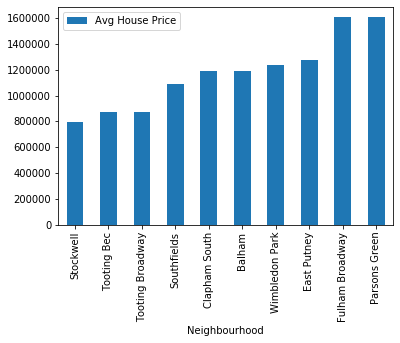

In [75]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

df_combined.plot(x='Neighbourhood',y='Avg House Price',ax=ax,kind='bar')